In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
import nltk as nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Embedding, Conv1D, BatchNormalization, ReLU, Dropout, GlobalMaxPooling1D, Concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import  BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers



# Customer sentiment and trend analysis:-
Customer sentiment and trend analysis is the process of using natural language processing (NLP), machine learning, and text analysis to identify and extract subjective information from customer reviews, social media posts, or other feedback. It categorizes feedback as positive, negative, or neutral to understand customer attitudes toward a product, service, or brand.

# Understanding the Data:-

Importing The required python packages

Reading & Loading data sets

In [3]:
#Load & read the dataset
df1 = pd.read_csv("/content/amazon.csv")
df1.head()

,label,Text
0,1,This is the best apps acording to a bunch of ...
1,1,This is a pretty good version of the game for ...
2,1,this is a really . there are a bunch of levels...
3,1,"This is a silly game and can be frustrating, b..."
4,1,This is a terrific game on any pad. Hrs of fun...


In [4]:
#Load & read the dataset
df2 = pd.read_csv("/content/negative2.csv", encoding='latin-1') # Specify the encoding as 'latin-1'
df2.head()

,label,Text
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


merging the datasets

In [5]:
data = pd.concat([df1,df2])
data.tail()

,label,Text
10458,0,doing #dishes hehe #silly #clean #housework ...
10459,0,â??do you want to be right or do you want to b...
10460,0,"really, @user !!!!! #thepurge is what you show..."
10461,0,shawnee city manager carol gonzales says being...
10462,0,such a sad story this is- simply horrible th...


Exploring the data set


In [6]:
#How many rows are negative (0) or psitive (1)
df1.label.value_counts()

,count
label,
1,15230
0,4766


In [7]:
#How many rows are negative (0) or psitive (1)
df2.label.value_counts()

,count
label,
0,10463


In [8]:
data.head()

,label,Text
0,1,This is the best apps acording to a bunch of ...
1,1,This is a pretty good version of the game for ...
2,1,this is a really . there are a bunch of levels...
3,1,"This is a silly game and can be frustrating, b..."
4,1,This is a terrific game on any pad. Hrs of fun...


In [9]:
#DataFrame.shape ==>Return a tuple representing the dimensionality of the DataFrame.
data.shape

(30459, 2)

In [10]:
#dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30459 entries, 0 to 10462
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   30459 non-null  int64 
 1   Text    30459 non-null  object
dtypes: int64(1), object(1)
memory usage: 713.9+ KB


In [11]:
#DataFrame.describe==>Generate descriptive statistics.
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
#Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.
data.describe()

,label
count,30459.000000
mean,0.500016
std,0.500008
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [12]:
#How many rows are negative (0) or psitive (1)
data.label.value_counts()

,count
label,
1,15230
0,15229


In [13]:
#How many rows are negative (0) or psitive (1)
#persentage
data.label.value_counts(normalize= True)

,proportion
label,
1,0.500016
0,0.499984


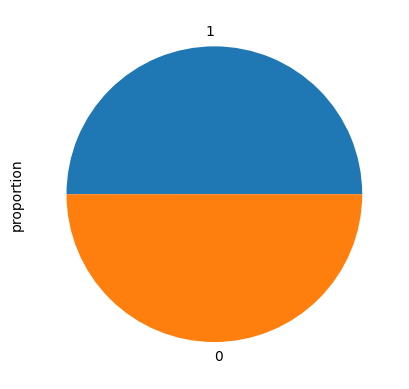

In [14]:
data.label.value_counts(normalize= True).plot.pie()
plt.show()


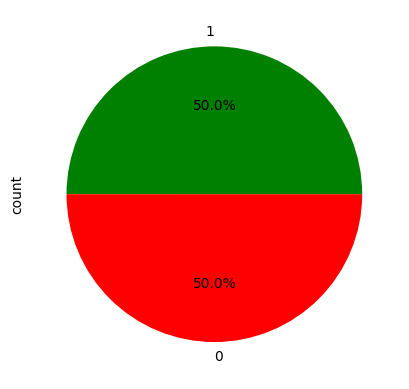

In [15]:
# Change pie chart colors here
colors = ["green", "red", "magenta", "orange"]
data.label.value_counts().plot.pie(colors = colors, autopct = "%1.1f%%")
plt.show()

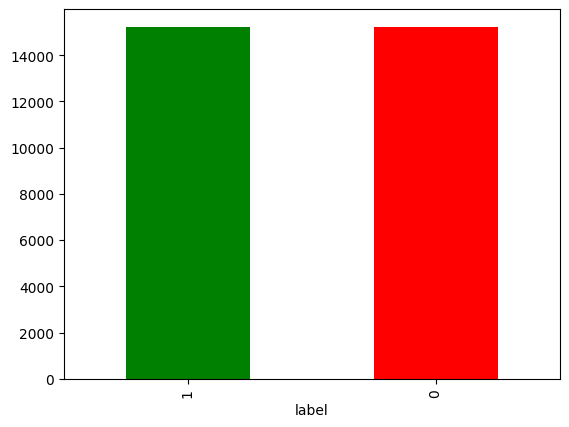

In [16]:
colors = ["green", "red", "magenta", "orange"]
data.label.value_counts().plot.bar(color = colors)
plt.show()

In [17]:
#How many NULLs/ missing values
data.isnull().value_counts()

,,count
label,Text,
False,False,30459


# Data Preparation-Pre-processing text data:-

Ultimate goals from the Pre-processing text data is To bring the text into a form that is predictable and analyzable for our task by Reducing the corpus of words that exposed to the model Explicitly correlate the word with similar meaning.
Cleaning up the text data is necessary to highlight attributes that we are going to want our model to pick up on. Cleaning (or pre-processing) the data typically consists of number of steps:
1. remove punctuation
2. tokenization
3. remove stop-words
4. lemmatization/stemming
5. vectorization/word embedding
6. feture engineering



Remove punctuation & Converting text to lowercase:-


In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
#add lower to teh remove_punc function
#list comprhansion
#lambda function
#adding join to join chars into words
def remove_punct(text):

    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

# data['Text_nopunc'] = data['Text'].apply(lambda x: remove_punct(x.lower()))

data.head()

,label,Text
0,1,This is the best apps acording to a bunch of ...
1,1,This is a pretty good version of the game for ...
2,1,this is a really . there are a bunch of levels...
3,1,"This is a silly game and can be frustrating, b..."
4,1,This is a terrific game on any pad. Hrs of fun...


In [20]:
pd.set_option('display.max_colwidth', 200) #customize display settings.

Tokenization:-

Tokenization is one of the most common tasks when it comes to working with text data Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.


Tokenization using NLTK :-

This is important because the meaning of the text could easily be interpreted by analyzing the words present in the text. The final Goal of Tokenization is : Creating Vocabulary

In [21]:
from nltk.tokenize import word_tokenize #import nltk

In [22]:
import re # Import the regular expression module

In [23]:
! pip install nltk
import nltk

nltk.download('punkt')

def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

# data['Text_tokenized'] = data['Text_nopunc'].apply(lambda x: tokenize(x))

data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,label,Text
0,1,This is the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff
1,1,This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.
2,1,this is a really . there are a bunch of levels and you can find golden eggs. super fun.
3,1,"This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time."
4,1,This is a terrific game on any pad. Hrs of fun. My grandkids love it. Great entertainment when waiting in long lines


In [24]:
data.sample(10)

,label,Text
4422,1,"I just love this app. It stores whatever you buy, so you can go thru the history to make more shopping lists. You don't have to type everything in each time you want to use it. You can list the..."
4555,0,any closer cooper haha ð??»ð??» #kitten #sweet #closeup #haha #joker #love #life
3404,1,This is a great game that I would recemend to all ages for younger ages turn on the safty feature in the options area
16442,1,This is the most full featured Sodoku app I've seen. Lots of puzzles make for days and days of puzzle fun. Highly recommend to anyone who enjoys sodoku.
11017,1,This app is very helpful for keeping track of every 'womanly' encounter from menstrating to mood and even weight. It gives calculated suggestions on when you will ovulate and start your next perio...
7601,1,We use this version of the Bible at our church. I love it as much as I love my King James Version I have had since I was saved in the sixth grade.
19835,1,I love this game it is so fun you get to interact with other people and you get to be responsable for your farm.
19297,1,"This game is actually quite challenging once you dive into it. On top of that it's a completely new concept of shooting your own missiles to block missiles. Collateral damage, cool graphics, and s..."
10137,1,I got so addicted to this game i would play it for hours i played it so much i beat the game within two weeks and i still play it
18543,1,"Not an app to keep, but funny for a download. Kills some time and somewhat amusing. Well made at the least!"


Remove stopwords:-

Stopwords are common words that are present in the text but generally do not contribute to the meaning of a sentence. They hold almost no importance for the purposes of information retrieval and natural language processing. They can safely be ignored without sacrificing the meaning of the sentence. For example – ‘the’ and ‘a’.

Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

The NLTK package has a separate package of stop words that can be downloaded. NLTK has stop words more than 16 languages which can be downloaded and used. Once it is downloaded, it can be passed as an argument indicating it to ignore these words.

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
#Removing stopwords
stopwords_En = nltk.corpus.stopwords.words('english')
#Expectation no and not
stopwords_En.remove('no')
stopwords_En.remove('not')

_____________________________________________________________

lemmatizaton:-

Lemmatizing : The process of grouping together the inflected forms of a word so they can be analyzed as a single term. Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language lemmatizing is using vocabulary analysis of words to remove inflectional endings and return to the dictionary form of a word.  So again : play, playing, played and plays  would all be simplified down to play, because that's the root of the word. Each variation carries the same meaning just with slightly different tense.  Will use the WordNet lemmatizer. This is probably the most popular lemmatizer.  WordNet is a collection of nouns, verbs, adjective and adverbs that are grouped together in sets of synonyms, each expressing a distinct concept.  This lemmatizer runs off of this corpus of synonyms, so given a word, it will track that word to its synonyms, and then the distinct concept that that group of words represents.

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [28]:
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [29]:
data.head(5)

,label,Text
0,1,This is the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff
1,1,This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.
2,1,this is a really . there are a bunch of levels and you can find golden eggs. super fun.
3,1,"This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time."
4,1,This is a terrific game on any pad. Hrs of fun. My grandkids love it. Great entertainment when waiting in long lines


Create function to remove punctuation, tokenize, remove stopwords, and lemmat


In [30]:
data.isnull().value_counts()

,,count
label,Text,
False,False,30459


In [31]:
from nltk.tokenize import word_tokenize #import nltk


In [32]:
def clean_text(text):
    # Remove punctuation and lowercase the text
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    # Tokenize the text
    # tokens = word_tokenize(text)
    # Lemmatize and remove stopwords
    # text = " ".join([wn.lemmatize(word) for word in tokens if word not in stopwords_En])
    return text

# Drop rows where 'Text' is NaN
data = data.dropna(subset=['Text'])

# Apply the cleaning function
data['cleaned_Text'] = data['Text'].apply(lambda x: clean_text(x))


In [33]:
data.shape

(30459, 3)

In [34]:
data.head()

,label,Text,cleaned_Text
0,1,This is the best apps acording to a bunch of people and I agree it has bombs eggs pigs TNT king pigs and realustic stuff,this is the best apps acording to a bunch of people and i agree it has bombs eggs pigs tnt king pigs and realustic stuff
1,1,This is a pretty good version of the game for being free. There are LOTS of different levels to play. My kids enjoy it a lot too.,this is a pretty good version of the game for being free there are lots of different levels to play my kids enjoy it a lot too
2,1,this is a really . there are a bunch of levels and you can find golden eggs. super fun.,this is a really there are a bunch of levels and you can find golden eggs super fun
3,1,"This is a silly game and can be frustrating, but lots of fun and definitely recommend just as a fun time.",this is a silly game and can be frustrating but lots of fun and definitely recommend just as a fun time
4,1,This is a terrific game on any pad. Hrs of fun. My grandkids love it. Great entertainment when waiting in long lines,this is a terrific game on any pad hrs of fun my grandkids love it great entertainment when waiting in long lines


In [35]:
# pip install sentence-transformers

In [43]:
pip install -U sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 7.3 MB/s eta 0:00:00


In [46]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained BERT-based model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate sentence embeddings
bert_embeddings = model.encode(data['cleaned_Text'].tolist())

# Convert to a DataFrame
embedding_df_bert = pd.DataFrame(bert_embeddings)

# Save embeddings to a file
embedding_df_bert.to_csv('bert_embeddings.csv', index=False)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [48]:
x=embedding_df_bert.values
y=data['label']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [52]:
print(X_train.shape)
print(y_train.shape)

(24367, 384)
(24367,)


In [53]:
print(X_test.shape)
print(y_test.shape)

(6092, 384)
(6092,)


### NN model_2

In [54]:
!pip install transformers

In [80]:
!pip install transformers
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split

In [81]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [82]:
X = data['cleaned_Text'].tolist()
y = data['label'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

In [84]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).shuffle(1000).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(16)

In [89]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
model.fit(train_dataset, epochs=3)
loss, accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {accuracy}')

ValueError: Could not interpret optimizer identifier: <keras.src.optimizers.adam.Adam object at 0x7dd4bc38a980>

In [75]:
model.fit(train_dataset, epochs=3)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [90]:
loss, accuracy = model.evaluate(test_dataset)
print(f'Test accuracy: {accuracy}')

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
model.save_pretrained('bert_model')